### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading CSV Files

In [2]:
companies = pd.read_csv('companies.csv',encoding='ISO-8859-1')
round2 = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')

### Getting the sense of Data and its fields
<br>

1. Observe Data Columns present in dataframe
2. Get Semse of datatypes and some data distribution

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Rock-Your-Paper,Karma,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [6]:
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
round2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [8]:
round2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


### Data Preparation on Companies Dataframe
<br>

1. We can observe that Unique Key in both dataframes in 'company_permalink' and 'permalink' which needs to be made lowercase or uppercase

2. Primary Sector column also needs to be derived from category_list as per SPARK FUNDS business logic

3. Status Column also needs is being made to upper case in case of furthur analysis

In [9]:
companies['permalink'] = companies['permalink'].apply(lambda x: x[14:].upper())
companies['status'] = companies['status'].apply(lambda x: x.upper())

def process(x):
    if pd.notnull(x) and '|' in x:
        return str(x.split('|')[0].upper())
    elif pd.notnull(x):
        return str(x).upper()
    else:
        return x
companies['primary_sector'] = companies['category_list'].apply(process)


### Results of Preprocessing Companies Dataframe

In [10]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,-FAME,#fame,http://livfame.com,Media,OPERATING,IND,16,Mumbai,Mumbai,NaN,MEDIA
1,-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,OPERATING,USA,DE,DE - Other,Delaware City,04-09-2014,APPLICATION PLATFORMS
2,-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,OPERATING,NaN,NaN,NaN,NaN,NaN,APPS
3,0-6-COM,0-6.com,http://www.0-6.com,Curated Web,OPERATING,CHN,22,Beijing,Beijing,01-01-2007,CURATED WEB
4,004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,OPERATING,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,SOFTWARE


### Data Preparation on Rounds Funding Dataframe 
<br>

1. 'Company permalink' Columns is being made to upper case as it will be used to join the MASTER DATAFRAME

In [11]:
round2['company_permalink'] = round2['company_permalink'].apply(lambda x: x[14:].upper())

### Results of Preparation on Rounds Funding Dataframe 

In [12]:
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### Creating Master Dataframe using Companies and Rounds Funding Tables

In [13]:
master_df = round2.merge(companies, left_on='company_permalink', right_on='permalink', how='inner')
print(master_df.info())
master_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114942 non-null  object 
 1   funding_round_permalink  114942 non-null  object 
 2   funding_round_type       114942 non-null  object 
 3   funding_round_code       31139 non-null   object 
 4   funded_at                114942 non-null  object 
 5   raised_amount_usd        94958 non-null   float64
 6   permalink                114942 non-null  object 
 7   name                     114941 non-null  object 
 8   homepage_url             108810 non-null  object 
 9   category_list            111535 non-null  object 
 10  status                   114942 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,-FAME,#fame,http://livfame.com,Media,OPERATING,IND,16,Mumbai,Mumbai,NaN,MEDIA
1,-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,OPERATING,USA,DE,DE - Other,Delaware City,04-09-2014,APPLICATION PLATFORMS
2,-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,OPERATING,USA,DE,DE - Other,Delaware City,04-09-2014,APPLICATION PLATFORMS
3,-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,OPERATING,NaN,NaN,NaN,NaN,NaN,APPS
4,0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6-COM,0-6.com,http://www.0-6.com,Curated Web,OPERATING,CHN,22,Beijing,Beijing,01-01-2007,CURATED WEB


# Filling Table 1.1 Entries

In [14]:
print('Unique Companies in Companies Table:', companies['permalink'].nunique())
print('Unique Companies in Companies Table by names:', companies['name'].apply(lambda x: str(x).casefold()).nunique())
temp = companies['name'].apply(lambda x: str(x).upper())
print('Companies having same Name but multiple IDs (permalink):', temp[temp.duplicated()==True].count())
print('Unique Companies in Rounds2 Table:',round2['company_permalink'].nunique())
print('Unique Companies in Master Table:',master_df['permalink'].nunique())


Unique Companies in Companies Table: 66368
Unique Companies in Companies Table by names: 66035
Companies having same Name but multiple IDs (permalink): 333
Unique Companies in Rounds2 Table: 66370
Unique Companies in Master Table: 66363


<br>
<br>

# INVESTMENTS PER FUNDING TYPE IN 15M RANGE (TABLE 2.1)
<br>

1. Slice the Data into the categories we are targetting for, i.e angel, venture, seed, private equity
2. Group the Data by funding type and lets see the average amounts of investments in each funding type

                   raised_amount_usd
                                mean
funding_round_type                  
angel                       958694.0
private_equity            73308593.0
seed                        719780.0
venture                   11748949.0


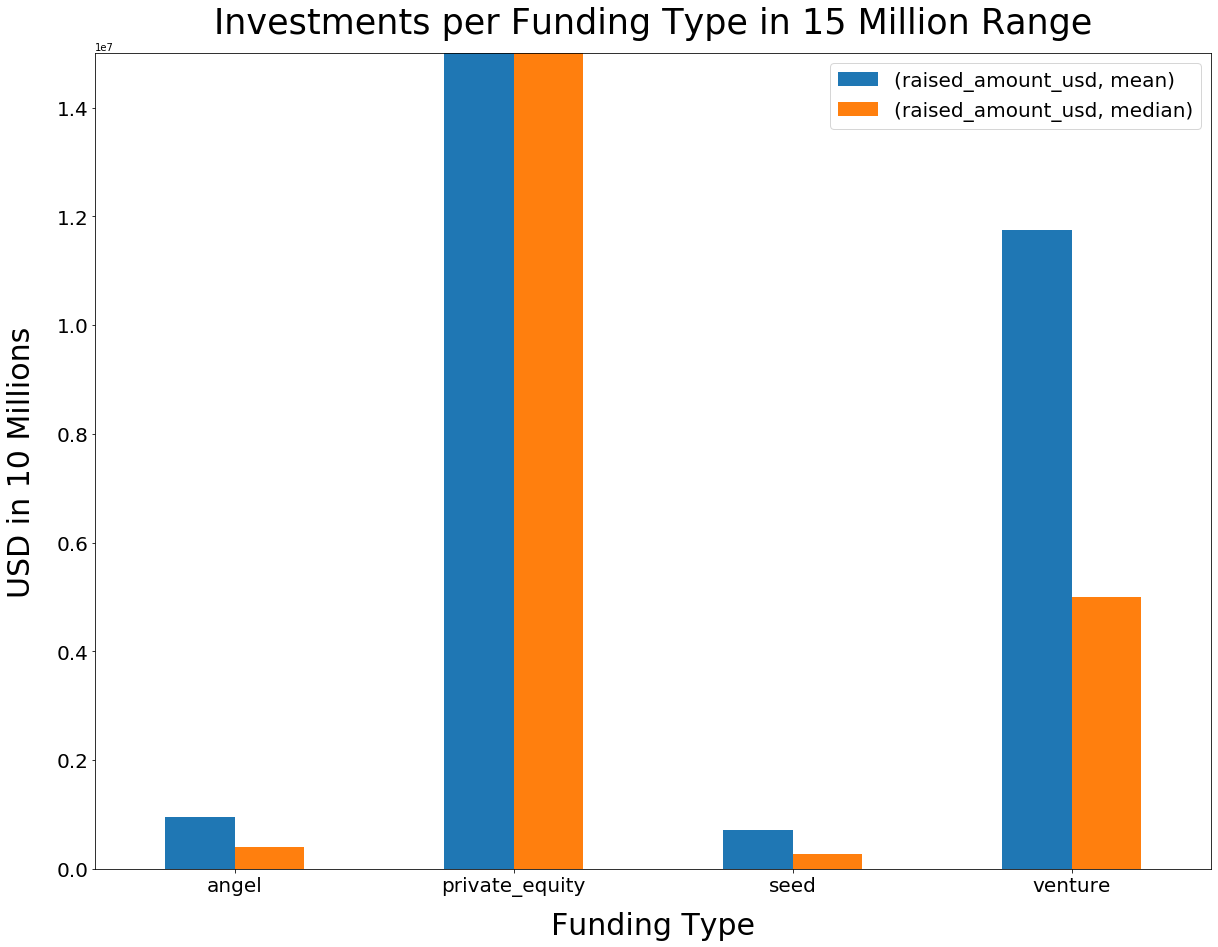

In [15]:
funding_type = master_df.loc[:,['funding_round_type', 'raised_amount_usd']]
types = ['seed','angel','venture','private_equity']
funding_type = funding_type[funding_type['funding_round_type'].isin(types)]

plt.rcParams['figure.figsize'] = [20, 15]


def percentile_95(x):
    return x.quantile(0.95)
def percentile_90(x):
    return x.quantile(0.90)
def percentile_75(x):
    return x.quantile(0.75)


plot = funding_type.groupby(['funding_round_type']).agg({"raised_amount_usd": [np.mean, np.median]}).round().plot
plot.bar(ylim=(0, 15000000), rot=0, fontsize=20)
plt.xlabel('Funding Type', fontsize=30, labelpad=15)
plt.ylabel('USD in 10 Millions', fontsize=30,labelpad=20)
plt.title('Investments per Funding Type in 15 Million Range', fontsize=35, pad=20)
plt.legend(fontsize=20)
print(funding_type.groupby(['funding_round_type']).agg({"raised_amount_usd": [np.mean]}).round())
plt.show()


### Results: 

### 1.  We can observe that angel and seed are below 5M range and Private equity is above 15M range. 
### 2. Venture Funding is in 5M-15M range and us suitable investment type for SPARK FUNDS

<br>
<br>

# TOP 10 COUNTRIES WITH HIGHEST VENTURE INVESTMENT
<br>

1. Select the Venture Type Funding Data Only.
2. Group by Country Code and aggregate the invesments using average 

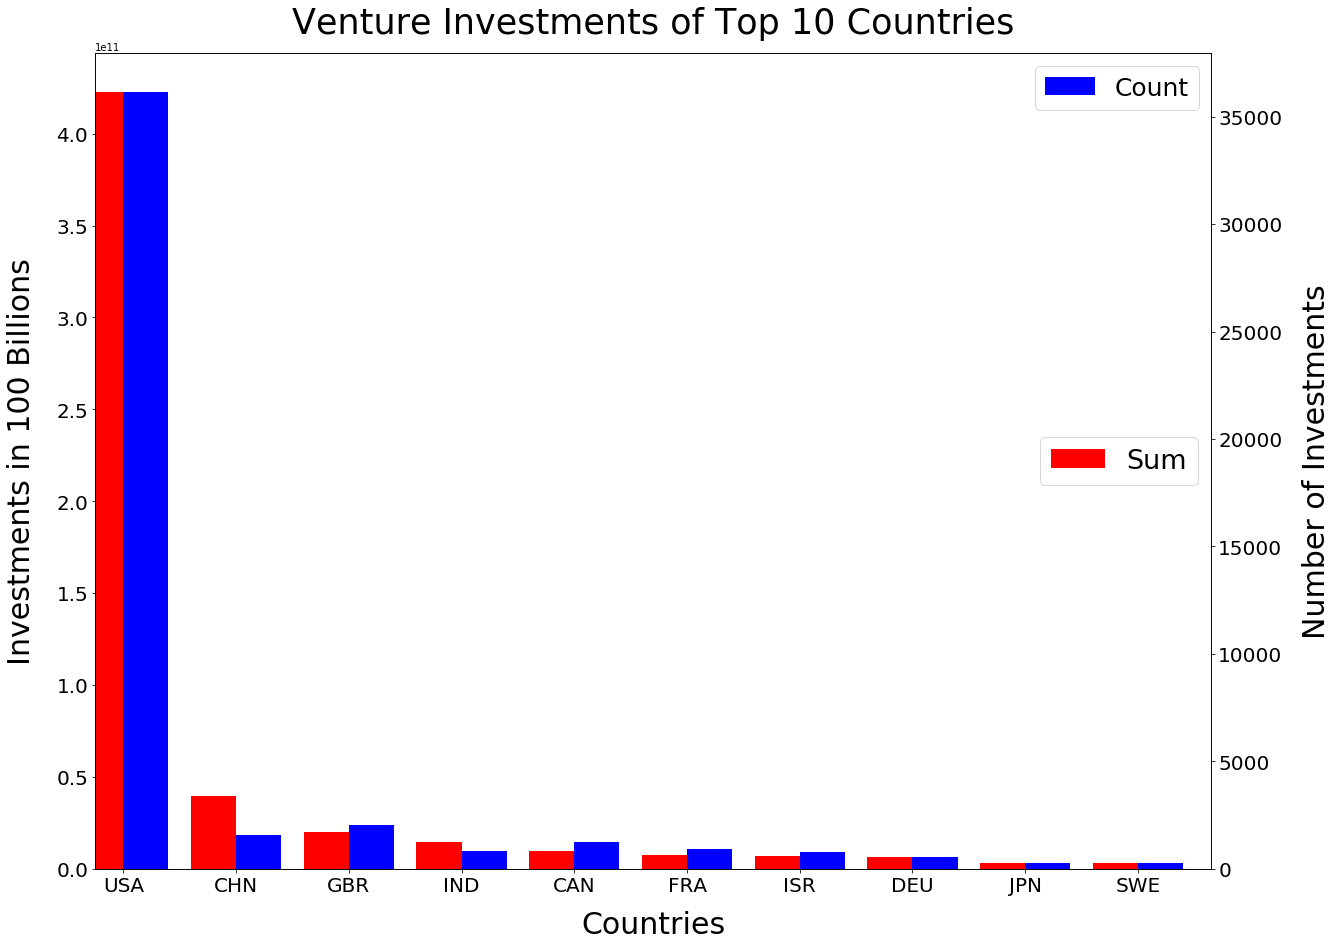

In [16]:
countrywise_df = master_df.loc[:,['funding_round_type', 'raised_amount_usd', 'country_code']]

countrywise_df = countrywise_df[countrywise_df['funding_round_type'].isin(['venture'])]
countrywise_venture_df = countrywise_df.loc[:,['raised_amount_usd', 'country_code']]
countrywise_venture_df['country_code'].unique()

top10 = countrywise_venture_df.groupby(['country_code']).agg(Count=('raised_amount_usd', 'count'), Sum=('raised_amount_usd', 
                            'sum')).round().sort_values(['Sum', 'Count'], ascending=False).head(10)



fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
plt.rcParams['figure.figsize'] = [20, 15]
top10.Sum.plot(kind='bar', color='red', ax=ax, width=width, position=1, rot=0, fontsize=20)
top10.Count.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, fontsize=20)
plt.title('Venture Investments of Top 10 Countries', fontsize=35, pad=20)
ax.set_ylabel('Investments in 100 Billions', fontsize=30,labelpad=20)
ax.set_xlabel('Countries', fontsize=30, labelpad=15)
ax2.set_ylabel('Number of Investments', fontsize=30,labelpad=20)
ax2.legend(loc=0, fontsize=25)
ax.legend(loc=7, fontsize=27)

plt.show()

### Results:

### 1. USA, CHINA, GREAT BRITAIN, INDIA, CANADA are Top 5 highest Venture Investments Countries

### 2. USA, GREAT BRITAIN, CANADA are TOP 3 ENGLISH SPEAKING highest Venture Investments Countries

<br>

### Read Mappings Table and Create Main_Sectors Column
<br>

1. Read Mappings Dataframe and assign Max Argument Column name as main_sector

2. Category List should be made upper case as our master dataframe also has those values in upper case

In [17]:
mappings = pd.read_csv('mapping.csv')
mappings['category_list'] = mappings['category_list'].apply(process)
mappings['main_sectors'] = mappings.iloc[:,1:].idxmax(axis=1)

<br>

3. Main_sectors are also made as upper case to remove case sensitivity
4. Remove Blank main_sector rows as they do not belong to any sector 

In [18]:
mappings['main_sectors'] = mappings['main_sectors'].apply(lambda x: x.upper())
mappings_subset = mappings.loc[:,['category_list','main_sectors']]
mappings_subset = mappings_subset[mappings_subset['main_sectors'] != 'BLANKS']

<br>

5. Merge Master Dataframe with Mappings to Create MASTER DATAFRAME WITH MAIN SECTOR

In [19]:
master_df_with_sector = master_df.merge(mappings_subset, left_on='primary_sector', right_on='category_list', how='inner')
master_df_with_sector.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sectors
0,-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,-FAME,#fame,http://livfame.com,Media,OPERATING,IND,16,Mumbai,Mumbai,NaN,MEDIA,MEDIA,ENTERTAINMENT
1,90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,OPERATING,GBR,H9,London,London,01-01-2011,MEDIA,MEDIA,ENTERTAINMENT
2,90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,OPERATING,GBR,H9,London,London,01-01-2011,MEDIA,MEDIA,ENTERTAINMENT
3,90MIN,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,OPERATING,GBR,H9,London,London,01-01-2011,MEDIA,MEDIA,ENTERTAINMENT
4,A-B-PRODUCTIONS,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,NaN,21-01-2014,NaN,A-B-PRODUCTIONS,A.B Productions,NaN,Media|Music|News,OPERATING,USA,CA,Los Angeles,Los Angeles,11-12-2012,MEDIA,MEDIA,ENTERTAINMENT


<br>
<br> 

# SECTOR WISE ANALYSIS OF TOP 3 ENGLISH SPEAKING COUNTRIES
<br>

1. Creating D1 (top english speaking, venture investing country within 5-15M) , D2, D3 dataframes 
2. D1(USA), D2(GBR), D3(CAN)

In [20]:
usa_venture_df = master_df_with_sector[master_df_with_sector['country_code'].isin(['USA']) & 
                                       master_df_with_sector['funding_round_type'].isin(['venture']) &
                                      master_df_with_sector['raised_amount_usd'].between(5000000, 15000000, inclusive=True)]

usa_venture_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sectors
10,ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,ALL-DEF-DIGITAL,All Def Digital,http://alldefdigital.com,Media,OPERATING,USA,CA,Los Angeles,Los Angeles,NaN,MEDIA,MEDIA,ENTERTAINMENT
43,CHEFS-FEED,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,CHEFS-FEED,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,OPERATING,USA,CA,SF Bay Area,San Francisco,01-01-2012,MEDIA,MEDIA,ENTERTAINMENT
98,HUFFINGTONPOST,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,HUFFINGTONPOST,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,ACQUIRED,USA,NY,New York City,New York,09-05-2005,MEDIA,MEDIA,ENTERTAINMENT
99,HUFFINGTONPOST,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,HUFFINGTONPOST,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,ACQUIRED,USA,NY,New York City,New York,09-05-2005,MEDIA,MEDIA,ENTERTAINMENT
134,MATCHMINE,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,MATCHMINE,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,CLOSED,USA,MA,Boston,Needham,01-01-2007,MEDIA,MEDIA,ENTERTAINMENT


In [21]:
gbr_venture_df = master_df_with_sector[master_df_with_sector['country_code'].isin(['GBR']) & 
                                       master_df_with_sector['funding_round_type'].isin(['venture']) &
                                      master_df_with_sector['raised_amount_usd'].between(5000000, 15000000, inclusive=True)]

gbr_venture_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sectors
1,90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,OPERATING,GBR,H9,London,London,01-01-2011,MEDIA,MEDIA,ENTERTAINMENT
2,90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,OPERATING,GBR,H9,London,London,01-01-2011,MEDIA,MEDIA,ENTERTAINMENT
368,COMMON-INTEREST-COMMUNITIES,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10000000.0,COMMON-INTEREST-COMMUNITIES,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,OPERATING,GBR,H9,London,London,NaN,APPLICATION PLATFORMS,APPLICATION PLATFORMS,"NEWS, SEARCH AND MESSAGING"
415,GEOSPOCK-LTD-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,5460000.0,GEOSPOCK-LTD-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,OPERATING,GBR,C3,London,Cambridge,01-01-2013,APPLICATION PLATFORMS,APPLICATION PLATFORMS,"NEWS, SEARCH AND MESSAGING"
416,GEOSPOCK-LTD-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5400000.0,GEOSPOCK-LTD-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,OPERATING,GBR,C3,London,Cambridge,01-01-2013,APPLICATION PLATFORMS,APPLICATION PLATFORMS,"NEWS, SEARCH AND MESSAGING"


In [22]:
can_venture_df = master_df_with_sector[master_df_with_sector['country_code'].isin(['CAN']) & 
                                       master_df_with_sector['funding_round_type'].isin(['venture']) &
                                      master_df_with_sector['raised_amount_usd'].between(5000000, 15000000, inclusive=True)]

can_venture_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sectors
643,500PX,/funding-round/344b1e2b60ff76f4548c69ea7c04901f,venture,A,07-08-2013,8800000.0,500PX,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,OPERATING,CAN,ON,Toronto,Toronto,01-10-2009,APPS,APPS,"NEWS, SEARCH AND MESSAGING"
644,500PX,/funding-round/36b2c6975d20b602b5d9ea9724e383ea,venture,B,21-07-2015,13000000.0,500PX,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,OPERATING,CAN,ON,Toronto,Toronto,01-10-2009,APPS,APPS,"NEWS, SEARCH AND MESSAGING"
2126,POLAR-ME,/funding-round/8306cc4e0122a91a0803cb5755be62e0,venture,NaN,23-01-2012,6000000.0,POLAR-ME,Polar,http://www.polar.me,Apps|Mobile|Software,OPERATING,CAN,ON,Toronto,Toronto,01-11-2007,APPS,APPS,"NEWS, SEARCH AND MESSAGING"
3234,BITSTRIPS,/funding-round/f495741fc9c3b54a87b0ff0b808d70c0,venture,B,29-10-2014,8000000.0,BITSTRIPS,Bitstrips,http://www.bitstrips.com,Curated Web|Digital Media|Entertainment|Messaging,OPERATING,CAN,ON,Toronto,Toronto,19-10-2007,CURATED WEB,CURATED WEB,"NEWS, SEARCH AND MESSAGING"
3398,CASERO,/funding-round/ae5a91d6dfef3f965d3d412b7714b8b4,venture,A,16-12-2004,7500000.0,CASERO,Casero,http://www.casero.com,Curated Web|Internet,ACQUIRED,CAN,ON,Toronto,Toronto,01-01-2002,CURATED WEB,CURATED WEB,"NEWS, SEARCH AND MESSAGING"


<br>
<br>

# COUNT AND SUM OF VENTURE INVESTMENTS IN TOP 3 ENGLISH SPEAKING COUTNRIES (TABLE 3.1)

### USA

In [23]:
print('Count:',usa_venture_df['raised_amount_usd'].count(), 'Sum:',usa_venture_df['raised_amount_usd'].sum())

Count: 11149 Sum: 99661524549.0


### GBR

In [24]:
print('Count:',gbr_venture_df['raised_amount_usd'].count(), 'Sum:',gbr_venture_df['raised_amount_usd'].sum())

Count: 577 Sum: 5028704358.0


### CANADA

In [25]:
print('Count:',can_venture_df['raised_amount_usd'].count(), 'Sum:',can_venture_df['raised_amount_usd'].sum())

Count: 394 Sum: 3374289958.0


## TOP 3 SECTORS IN EACH COUNTRY

### USA

In [26]:
sector_plot = usa_venture_df.groupby(['main_sectors']).agg(Count=('raised_amount_usd', 'count'), Sum=('raised_amount_usd', 
                            'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

usa_venture_df.groupby(['main_sectors']).agg(Count=('raised_amount_usd', 'count'), Sum=('raised_amount_usd', 
                            'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
main_sectors,,
OTHERS,2923,2.608928e+10
CLEANTECH / SEMICONDUCTORS,2297,2.118100e+10
"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",1912,1.668070e+10


### GBR

In [27]:
sector_plot = pd.concat([sector_plot, gbr_venture_df.groupby(['main_sectors']).agg(Count=('raised_amount_usd', 'count'), Sum=('raised_amount_usd', 
                            'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)])

gbr_venture_df.groupby(['main_sectors']).agg(Count=('raised_amount_usd', 'count'), Sum=('raised_amount_usd', 
                            'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
main_sectors,,
OTHERS,143,1.249124e+09
CLEANTECH / SEMICONDUCTORS,127,1.136905e+09
"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",98,8.218884e+08


### CANADA

In [28]:
sector_plot = pd.concat([sector_plot, can_venture_df.groupby(['main_sectors']).agg(Count=('raised_amount_usd', 'count'), 
                        Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)])

can_venture_df.groupby(['main_sectors']).agg(Count=('raised_amount_usd', 'count'), Sum=('raised_amount_usd', 
                            'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
main_sectors,,
CLEANTECH / SEMICONDUCTORS,112,1.015888e+09
OTHERS,109,9.261380e+08
"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",52,4.433431e+08


### ABBREVATING LONG INDEX NAMES

In [29]:
sector_plot = sector_plot.rename(index={'CLEANTECH / SEMICONDUCTORS': 'C/S'})
sector_plot = sector_plot.rename(index={'SOCIAL, FINANCE, ANALYTICS, ADVERTISING': 'S/F/AN/AD'})
sector_plot

,Count,Sum
main_sectors,,
OTHERS,2923,2.608928e+10
C/S,2297,2.118100e+10
S/F/AN/AD,1912,1.668070e+10
OTHERS,143,1.249124e+09
C/S,127,1.136905e+09
S/F/AN/AD,98,8.218884e+08
C/S,112,1.015888e+09
OTHERS,109,9.261380e+08
S/F/AN/AD,52,4.433431e+08


<br>
<br>

# PLOT OF TOP 3 SECTORS IN USA, GBR AND CANADA (FROM ABOVE)

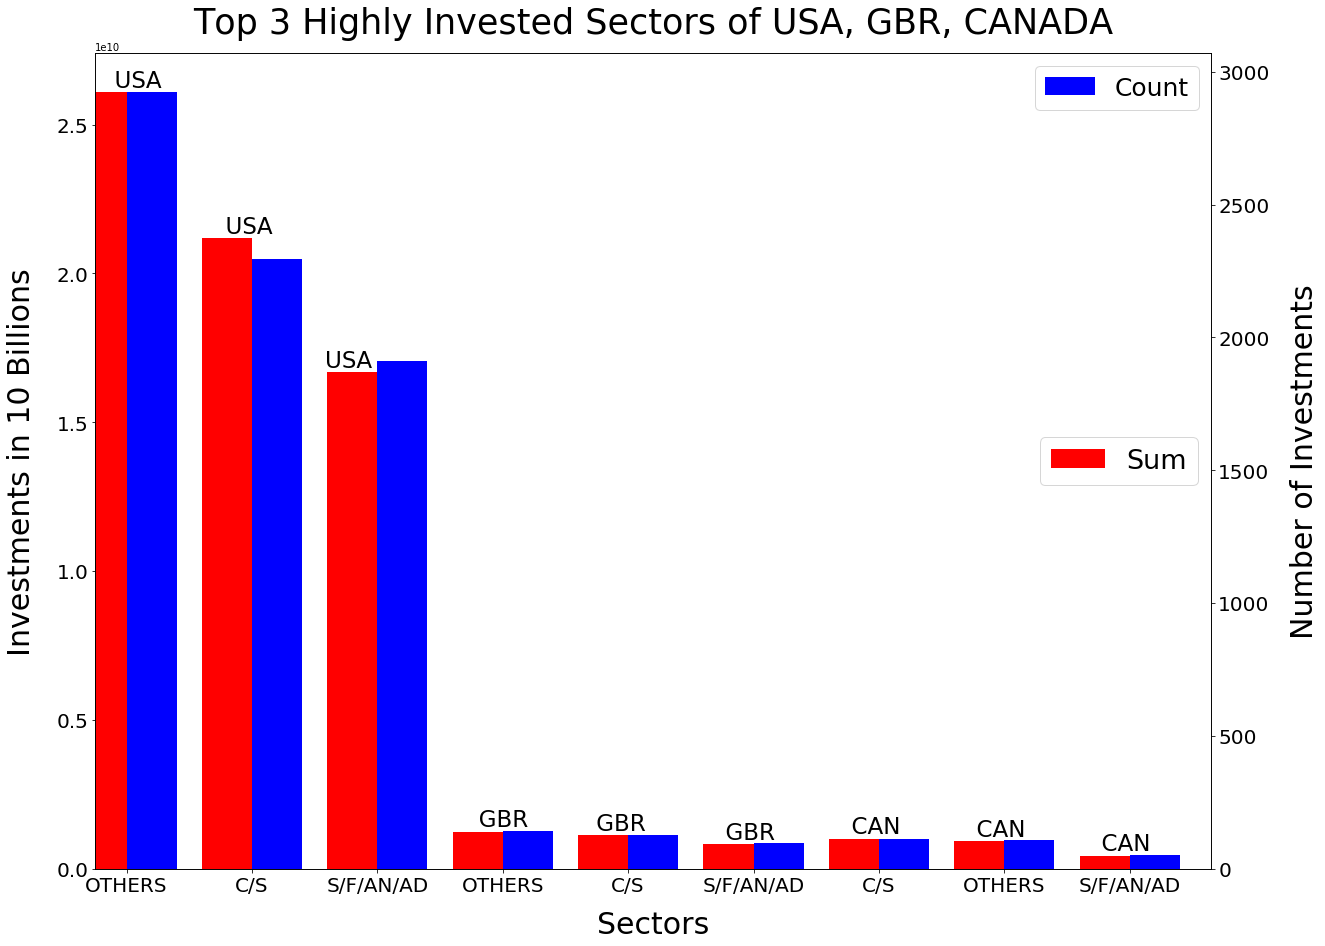

In [30]:

fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
plt.rcParams['figure.figsize'] = [20, 15]
sector_plot.Sum.plot(kind='bar', color='red', ax=ax, width=width, position=1, rot=0, fontsize=20)
sector_plot.Count.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, fontsize=20)
plt.title('Top 3 Highly Invested Sectors of USA, GBR, CANADA', fontsize=35, pad=20)
ax.set_ylabel('Investments in 10 Billions', fontsize=30,labelpad=20)
ax.set_xlabel('Sectors', fontsize=30, labelpad=15)
ax2.set_ylabel('Number of Investments', fontsize=30,labelpad=20)
ax2.legend(loc=0, fontsize=25)
ax.legend(loc=7, fontsize=27)
rects = ax.patches

# Make some labels for country and give 6 spaces so that they align in the middle

labels = ["          USA","      USA","USA ", "       GBR","     GBR","      GBR", "      CAN","      CAN","      CAN"]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=23)

plt.show()

## HIGHEST INVESTED COMPANY IN TOP SECTORS OF USA

### SECTOR = 'OTHERS' (TOP 1)

In [31]:
usa_venture_df[usa_venture_df['main_sectors'].isin(['OTHERS'])].groupby(['name']).agg(Count=('raised_amount_usd', 
                'count'), Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
name,,
Virtustream,6,64300000.0
Capella Photonics,6,54968051.0
Black Duck Software,6,51000000.0


### SECTOR = 'CLEANTECH / SEMICONDUCTORS' (TOP 2)

In [32]:
usa_venture_df[usa_venture_df['main_sectors'].isin(['CLEANTECH / SEMICONDUCTORS'])].groupby(['name']).agg(Count=('raised_amount_usd', 
                'count'), Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
name,,
Biodesix,8,75300000.0
Tigo Energy,8,68739496.0
ForSight Labs,7,61300001.0


## HIGHEST INVESTED COMPANY IN TOP SECTORS OF GREAT BRITAIN

### SECTOR = 'OTHERS' (TOP 1)

In [33]:
gbr_venture_df[gbr_venture_df['main_sectors'].isin(['OTHERS'])].groupby(['name']).agg(Count=('raised_amount_usd', 
                'count'), Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
name,,
Electric Cloud,4,37000000.0
SenSage,4,36250000.0
Enigmatec,3,32500000.0


### SECTOR = 'CLEANTECH / SEMICONDUCTORS' (TOP 2)

In [34]:
gbr_venture_df[gbr_venture_df['main_sectors'].isin(['CLEANTECH / SEMICONDUCTORS'])].groupby(['name']).agg(Count=('raised_amount_usd', 
                'count'), Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
name,,
EUSA Pharma,3,35600000.0
Horizon Discovery,3,31353719.0
F-star Biotechnology Limited,3,29132906.0


## HIGHEST INVESTED COMPANY IN TOP SECTORS OF CANADA

### SECTOR = 'CLEANTECH / SEMICONDUCTORS' (TOP 1)

In [35]:
can_venture_df[can_venture_df['main_sectors'].isin(['CLEANTECH / SEMICONDUCTORS'])].groupby(['name']).agg(Count=('raised_amount_usd', 
                'count'), Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
name,,
Fresco Microchip,4,48000000.0
Ostara,4,43152682.0
Diablo Technologies,3,35500000.0


### SECTOR = 'OTHERS' (TOP 2)

In [36]:
can_venture_df[can_venture_df['main_sectors'].isin(['OTHERS'])].groupby(['name']).agg(Count=('raised_amount_usd', 
                'count'), Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
name,,
QuickPlay Media,3,38700000.0
NewStep Networks,3,31477853.0
Strangeloop Networks,2,21500000.0
